##**Practical Python – Error Handling,Logging, and Data Manipulation|Assignment**


1. What is the difference between multithreading and multiprocessing?
- Independence: In multiprocessing, each process has its own memory space and resources. Processes are independent of each
other, and communication between them requires explicit IPC mechanisms.
In multithreading, multiple threads share the same memory space within a single process. Threads are lighter weight than processes and share resources more easily.
- Communication: Multiprocessing relies on IPC for communication between processes. This can involve message passing, shared
memory, or other communication mechanisms.
Multithreading involves sharing data more directly since threads within the same process share the same memory space.
- Fault Isolation: Processes in multiprocessing are more isolated, providing better fault isolation. If one process crashes, it does
not necessarily affect others. Threads in multithreading share the same memory space, making them more susceptible to issues such as data corruption or unintended interactions.
- Resource Utilization:Multiprocessing can take advantage of multiple CPU cores, as each process can run on a separate core.
Multithreading is suitable for tasks that can be parallelized within a single process but may not fully utilize multiple cores.
- Distributed Computing: Multiprocessing is fundamental in distributed computing, where tasks are distributed across multiple nodes or machines. Each node runs its processes, and communication between them is vital for collaborative computation.

2. What are the challenges associated with memory management in Python?
- Reference Cycles: Python uses reference counting to track object usage. If two or more objects reference each other, they form a cycle, which prevents automatic deletion even if they’re no longer in use. The garbage collector can detect such cycles, but it adds extra overhead and doesn’t always handle complex cases efficiently.
- Memory Leaks: Improper handling of references (like keeping unnecessary references in global variables, caches, or data structures) can cause memory leaks. Memory leaks slowly increase memory usage over time and can make long-running applications slow or unstable.
- Fragmentation: Python’s memory allocator (especially in CPython) can lead to heap fragmentation, where free memory becomes scattered. This reduces memory efficiency and can cause the program to use more system memory than needed.
- Large Object Handling: Python struggles with very large objects (e.g., big data arrays or nested structures) because,They take time to allocate and free.They may not fit in contiguous memory. Reference counting increases overhead when copying or passing such objects around.

3.:Write a Python program that logs an error message to a log file when a
division by zero exception occurs.


In [2]:
import logging

logging.basicConfig(
    filename='error.log',        # Log file name
    level=logging.ERROR,         # Log only errors and above
    format='%(asctime)s - %(levelname)s - %(message)s'
)

try:
    a = 10
    b = 0
    c = a / b

except ZeroDivisionError as e:
    # Log the error message
    logging.error("Division by zero error occurred: %s", e)
    print("An error occurred! Check 'error.log' for details.")

ERROR:root:Division by zero error occurred: division by zero


An error occurred! Check 'error.log' for details.


4. Write a Python program that reads from one file and writes its content to
another file

In [5]:
def copy_file(source_file, destination_file):
    try:
        # Open source file in read mode
        with open(source_file, 'r') as source:
            content = source.read()

        # Open destination file in write mode
        with open(destination_file, 'w') as destination:
            destination.write(content)

        print(f"Content copied from {source_file} to {destination_file} successfully.")

    except FileNotFoundError:
        print(f"Error: File {source_file} not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

5. Write a program that handles both IndexError and KeyError using a
try-except block.


In [3]:
try:
    # Example list and dictionary
    numbers = [10, 20, 30]
    data = {"name": "Anushka", "age": 21}

    # Intentionally causing IndexError
    print(numbers[5])  # Invalid index

    # Intentionally causing KeyError
    print(data["address"])  # Key doesn't exist

except IndexError:
    print("Error: You tried to access an index that does not exist in the list.")

except KeyError:
    print("Error: You tried to access a key that does not exist in the dictionary.")

print("Program continues after handling the exceptions.")

Error: You tried to access an index that does not exist in the list.
Program continues after handling the exceptions.


6. What are the differences between NumPy arrays and Python lists?
- NumPy arrays and Python lists differ in how they handle data types. A NumPy array can store only elements of the same data type, such as all integers or all floats, which ensures efficiency in numerical computations. In contrast, a Python list can contain elements of different data types, for example, integers, strings, and floats, all in the same list.

- Another major difference lies in performance and memory usage. NumPy arrays are much faster and more memory-efficient because they are implemented in C and use contiguous memory blocks. Python lists, however, store each element as a separate Python object, which takes up more memory and makes operations slower.

- NumPy arrays also support vectorized operations, meaning mathematical operations can be performed directly on entire arrays without writing explicit loops. Python lists do not support this; instead, loops or list comprehensions are needed to perform element-wise operations, which is less efficient.

- NumPy arrays are designed for numerical and scientific computing, supporting multi-dimensional data like matrices and tensors. Python lists, on the other hand, are mainly one-dimensional and are used for general-purpose programming where mixed data types may be needed.

7. Explain the difference between apply() and map() in Pandas.
- map() :-  Map Used with a Series (one-dimensional data). Purpose of using map() is Applies a function, dictionary, or mapping to each element in the Series.
- apply() :- apply () Used with a DataFrame or Series.Purpose of using this for Applies a function along an axis (rows or columns) for a DataFrame, or element-wise for a Series.



8. : Create a histogram using Seaborn to visualize a distribution.


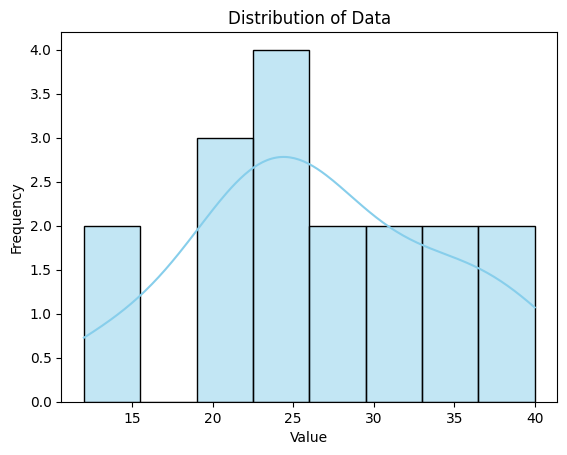

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = [12, 15, 20, 21, 22, 23, 24, 25, 25, 26, 27, 30, 32, 35, 36, 38, 40]

# Create histogram
sns.histplot(data, bins=8, kde=True, color='skyblue')

# Add title and labels
plt.title("Distribution of Data")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Show the plot
plt.show()


9. Use Pandas to load a CSV file and display its first 5 rows.

In [ ]:
#firstly I created a csv file
import pandas as pd

# Create some sample data
data = {
    'Name': ['shyam', 'Ravi', 'Priya', 'Aman', 'Neha', 'Rahul'],
    'Age': [21, 23, 22, 24, 20, 25],
    'City': ['Delhi', 'Mumbai', 'Chennai', 'Pune', 'Kolkata', 'Bangalore']
}

# Convert data into a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame as a CSV file
df.to_csv('students.csv', index=False)

print("✅ 'students.csv' file has been created successfully!")


✅ 'students.csv' file has been created successfully!


In [ ]:
import pandas as pd

data = pd.read_csv('students.csv')

print(data.head())



      Name  Age     City
0  Anushka   21    Delhi
1     Ravi   23   Mumbai
2    Priya   22  Chennai
3     Aman   24     Pune
4     Neha   20  Kolkata


10. Calculate the correlation matrix using Seaborn and visualize it with a
heatmap.


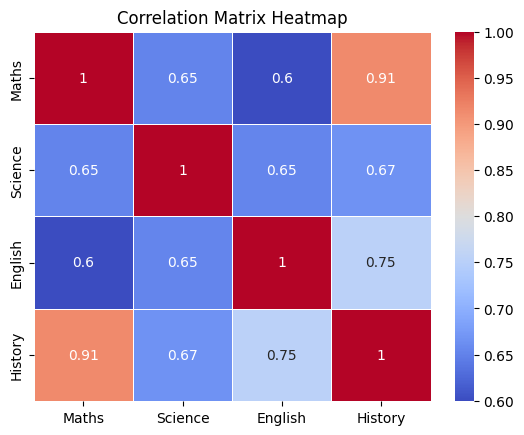

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create sample data
data = {
    'Maths': [78, 85, 96, 80, 86, 90],
    'Science': [84, 95, 92, 75, 89, 91],
    'English': [70, 88, 82, 78, 85, 87],
    'History': [65, 76, 80, 70, 72, 75]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Step 1: Calculate correlation matrix
corr_matrix = df.corr()

# Step 2: Visualize using Seaborn heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Step 3: Show plot
plt.title('Correlation Matrix Heatmap')
plt.show()
